In [1]:
import pandas as pd
from plotgenerators.plots import EloPlot, Data
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
fullData = pd.read_csv('humans.csv', header=0)
data = fullData[(fullData.ID != 2) & (fullData.ID != 9)] # Remove ourself from data
persons = list(data.ID.unique())
elos = {'Normal': 2493.45, 'Fruit': 2202.68}
modes = ['Normal', 'Fruit']
N = len(data.ID)
colors = ['#2196F3', '#4CAF50', '#9C27B0', '#673ab7', '#795548', '#ffeb3b', '#E91E63', '#9C27B0', '#F44336']
data


,ID,Age,Kid,Training,Minmax,Fruit,PlayerStarts,GameN,Length,Human,AI,Score
0,1,52,0,0,1,0,1,1,99,4,6,0.0
1,1,52,0,0,1,0,1,2,94,6,9,0.0
2,1,52,0,0,1,0,1,3,126,5,7,0.0
3,1,52,0,0,1,0,1,4,109,6,7,0.0
4,1,52,0,0,1,0,1,5,134,9,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,12,49,0,0,0,1,1,1,26,4,9,0.0
176,12,49,0,0,0,1,1,2,36,6,9,0.0
177,12,49,0,0,0,1,1,3,19,0,9,0.0
178,12,49,0,0,0,1,1,4,33,2,9,0.0


In [3]:
def calculateElo(mask, Rb, biased=True):
    scores = data.Score[mask]
    if biased and len(scores) != 0:
        scores = np.concatenate((scores, [0.5]))
    Ea = scores.mean()
    if Ea <= 0:
        return 1000
    if Ea >= 1:
        return 3000
    return (math.log(10)*Rb - 400*math.log((-Ea + 1)/Ea))/math.log(10)

In [4]:
histElos = {'Normal': [], 'Fruit': []}
histLength = {'Normal': [], 'Fruit': []}
histHuman = {'Normal': [], 'Fruit': []}
histAI = {'Normal': [], 'Fruit': []}
for person in persons:
    for fruit, mode in enumerate(modes):
        mask = (data.ID == person) & (data.Fruit == fruit)
        elo = calculateElo(mask, elos[mode])
        histLength[mode].append(data.Length[mask].mean())
        histHuman[mode].append(data.Human[mask].mean())
        histAI[mode].append(data.AI[mask].mean())
        histElos[mode].append(elo)
        print(f"{mode}-elo for player {person}: {elo}")

Normal-elo for player 1: 2280.8584331830975
Fruit-elo for player 1: 1990.0884331830978
Normal-elo for player 3: nan
Fruit-elo for player 3: 1673.7922821064321
Normal-elo for player 4: nan
Fruit-elo for player 4: 1882.0270615067332
Normal-elo for player 5: nan
Fruit-elo for player 5: 1673.7922821064321
Normal-elo for player 6: 2172.797061506733
Fruit-elo for player 6: 2234.3524984190494
Normal-elo for player 7: nan
Fruit-elo for player 7: 2011.8314981121348
Normal-elo for player 8: 2429.569662852995
Fruit-elo for player 8: 2138.799662852995
Normal-elo for player 10: 2302.601498112135
Fruit-elo for player 10: 2105.464780525482
Normal-elo for player 11: 2302.601498112135
Fruit-elo for player 11: 2144.2287857287047
Normal-elo for player 12: 2076.8929259367096
Fruit-elo for player 12: 1786.1229259367096


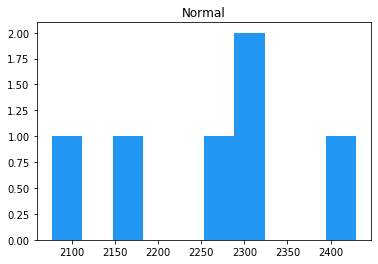

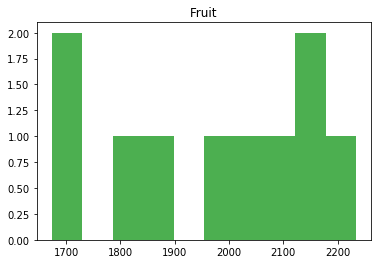

In [5]:
for fruit, mode in enumerate(modes):
    plt.hist(histElos[mode], color=colors[fruit])
    plt.title(mode)
    plt.savefig(f"GoodHuman/Elo-{mode}", bbox_inches='tight', dpi = 300)
    plt.show()

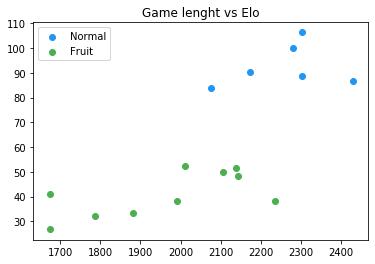

In [6]:
for fruit, mode in enumerate(modes):
    plt.scatter(histElos[mode], histLength[mode], color=colors[fruit], marker='o', label=mode)
    plt.legend(loc='upper left')
    plt.title('Game lenght vs Elo')
plt.savefig(f"GoodHuman/GameLength", bbox_inches='tight', dpi = 300)
plt.show()

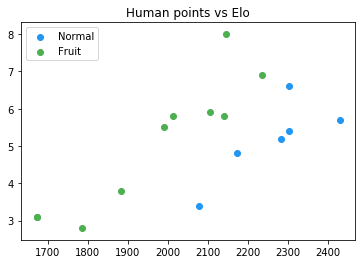

In [7]:
for fruit, mode in enumerate(modes):
    plt.scatter(histElos[mode], histHuman[mode], color=colors[fruit], marker='o', label=mode)
    plt.legend(loc='upper left')
    plt.title('Human points vs Elo')
plt.savefig(f"GoodHuman/HumanPoints", bbox_inches='tight', dpi = 300)
plt.show()

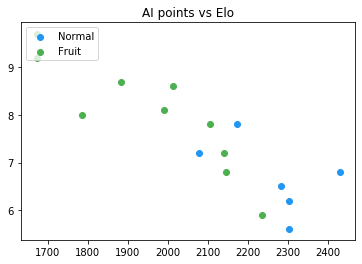

In [8]:
for fruit, mode in enumerate(modes):
    plt.scatter(histElos[mode], histAI[mode], color=colors[fruit], marker='o', label=mode)
    plt.legend(loc='upper left')
    plt.title('AI points vs Elo')
plt.savefig(f"GoodHuman/AIPoints", bbox_inches='tight', dpi = 300)
plt.show()

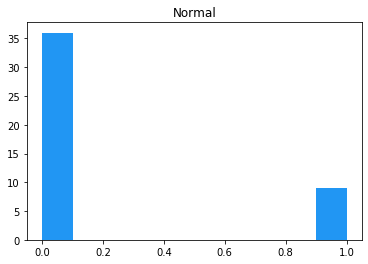

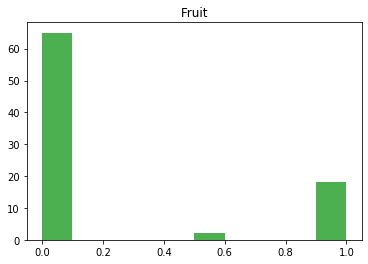

In [9]:
for fruit, mode in enumerate(modes):
    plt.hist(data[data.Fruit == fruit].Score, color=colors[fruit])
    plt.title(mode)
    plt.savefig(f"GoodHuman/Score-{mode}", bbox_inches='tight', dpi = 300)
    plt.show()

In [10]:
for fruit, mode in enumerate(modes):
    print(f"{mode}-elo for person: {calculateElo([True]*N, elos[mode], biased=False)}")

Normal-elo for person: 2268.8731438321206
Fruit-elo for person: 1978.1031438321206


In [11]:
for fruit, mode in enumerate(modes):
    print(f"{mode}-gamelengt: {data.Length[data.Fruit == fruit].mean()}")

Normal-gamelengt: 92.6
Fruit-gamelengt: 40.63529411764706


In [12]:
l = [('Fruit-2000', 'Fruit - Explorer 2000', '#2196F3'), ('Fruit-5000', 'Fruit - Explorer 5000', '#4CAF50')]

with EloPlot(title=f'The Fruit - Elo Rating', saves=[f'GoodHuman/BestFruitHuman.png'], CR=False, CRP=False, loc='lower right') as plt:
    plt.axhline(y=2202.68, color='#795548', lw=3, label='AI + minmax', zorder=1)
    plt.axhline(y=1978.1, color='#673ab7', lw=3, label='Human', zorder=1)
    for EloOverTime, name, agent, color in Data([f".\\outputs\\{a[0]}\\csv" for a in l], colors=[a[2] for a in l], elo=False):
        name = [a[1] for a in l if a[0] == name][0]
        plt.varPlot(plt, EloOverTime, name, color)
    plt.axhline(y=1480.4, color='#E91E63', lw=1, label='CleverRandom+probs', zorder=1)
    plt.axhline(y=1289.0, color='#9C27B0', lw=1, label='CleverRandom', zorder=1)

<Figure size 432x288 with 0 Axes>

In [13]:
l = [('Best-2000', 'Explorer 2000', '#2196F3'), ('Best-5000', 'Explorer 5000', '#4CAF50')]

with EloPlot(title=f'The Best - Elo Rating', saves=[f'GoodHuman/BestNoFruitHuman.png'], loc='lower right') as plt:
    plt.axhline(y=2493.45, color='#795548', lw=3, label='AI + minmax', zorder=1)
    plt.axhline(y=2268.87, color='#673ab7', lw=3, label='Human', zorder=1)
    plt.ylim((900, 2520))
    for EloOverTime, name, agent, color in Data([f".\\outputs\\{a[0]}\\csv" for a in l], colors=[a[2] for a in l], elo=False):
        name = [a[1] for a in l if a[0] == name][0]
        plt.varPlot(plt, EloOverTime, name, color)

<Figure size 432x288 with 0 Axes>